Drawing Image

C:\Users\User\AppData\Local\Temp\ipykernel_7016\1660869120.py:3: DeprecationWarning: scipy.misc.face has been deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. Dataset methods have moved into the scipy.datasets module. Use scipy.datasets.face instead.
  i = misc.face(gray=False)


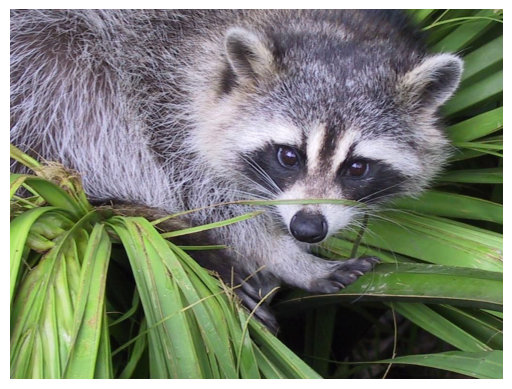

In [1]:
import numpy as np
from scipy import misc
i = misc.face(gray=False)
import matplotlib.pyplot as plt
plt.grid(True)
plt.gray()
plt.axis('off')
plt.imshow(i)
plt.show()

In [2]:
i

array([[[121, 112, 131],
        [138, 129, 148],
        [153, 144, 165],
        ...,
        [119, 126,  74],
        [131, 136,  82],
        [139, 144,  90]],

       [[ 89,  82, 100],
        [110, 103, 121],
        [130, 122, 143],
        ...,
        [118, 125,  71],
        [134, 141,  87],
        [146, 153,  99]],

       [[ 73,  66,  84],
        [ 94,  87, 105],
        [115, 108, 126],
        ...,
        [117, 126,  71],
        [133, 142,  87],
        [144, 153,  98]],

       ...,

       [[ 87, 106,  76],
        [ 94, 110,  81],
        [107, 124,  92],
        ...,
        [120, 158,  97],
        [119, 157,  96],
        [119, 158,  95]],

       [[ 85, 101,  72],
        [ 95, 111,  82],
        [112, 127,  96],
        ...,
        [121, 157,  96],
        [120, 156,  94],
        [120, 156,  94]],

       [[ 85, 101,  74],
        [ 97, 113,  84],
        [111, 126,  97],
        ...,
        [120, 156,  95],
        [119, 155,  93],
        [118, 154,  92]]

C:\Users\User\AppData\Local\Temp\ipykernel_7016\3988997587.py:1: DeprecationWarning: scipy.misc.face has been deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. Dataset methods have moved into the scipy.datasets module. Use scipy.datasets.face instead.
  i = misc.face(gray=True)


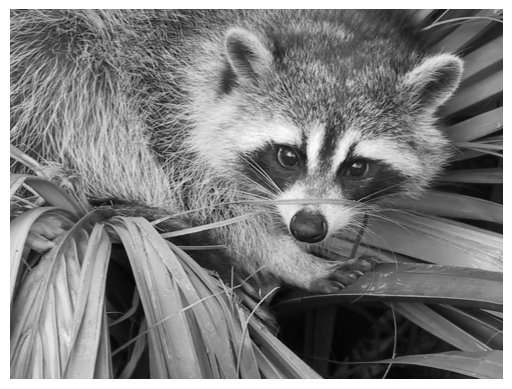

In [3]:
i = misc.face(gray=True)
plt.grid(False)
plt.gray()
plt.axis('off')
plt.imshow(i)
plt.show()

In [4]:
i.shape

(768, 1024)

Storing image

In [5]:
import numpy as np
i_transformed = np.copy(i)
i_transformed

array([[114, 130, 145, ..., 119, 129, 137],
       [ 83, 104, 123, ..., 118, 134, 146],
       [ 68,  88, 109, ..., 119, 134, 145],
       ...,
       [ 98, 103, 116, ..., 144, 143, 143],
       [ 94, 104, 120, ..., 143, 142, 142],
       [ 94, 106, 119, ..., 142, 141, 140]], dtype=uint8)

In [6]:
filter = [
    [3, 10, 3],
    [0, 0, 0],
    [-3, -10, -3]
]
weight = 1

In [7]:
size_x = i_transformed.shape[0]
size_y = i_transformed.shape[1]

for x in range(1, size_x - 1):
  for y in range(1, size_y  - 1):
    convolution = 0.0
    convolution = convolution + (i[x - 1, y - 1] * filter[0][0])
    convolution = convolution + (i[x, y - 1] * filter[0][1])
    convolution = convolution + (i[x + 1, y - 1] * filter[0][2])
    convolution = convolution + (i[x - 1, y] * filter[1][0])
    convolution = convolution + (i[x, y] * filter[1][1])
    convolution = convolution + (i[x + 1, y] * filter[1][2])
    convolution = convolution + (i[x - 1, y + 1] * filter[2][0])
    convolution = convolution + (i[x, y + 1] * filter[2][1])
    convolution = convolution + (i[x + 1, y + 1] * filter[2][2])
    convolution = convolution * weight
    if(convolution < 0):
      convolution = 0
    if(convolution > 255):
      convolution = 255
    i_transformed[x, y] = convolution

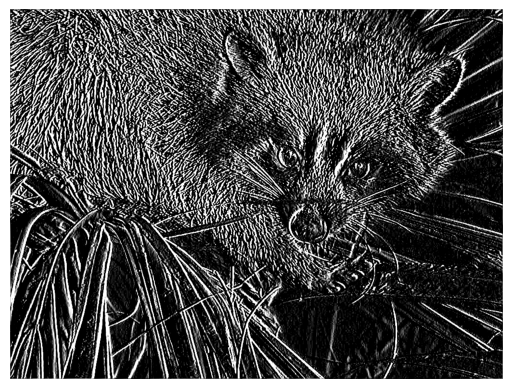

In [8]:
plt.grid(False)
plt.gray()
plt.axis('off')
plt.imshow(i_transformed)
plt.show()

Create Visualized filters and pooling

In [9]:
import matplotlib.gridspec as gridspec
import tensorflow.compat.v1 as tf
from PIL import Image


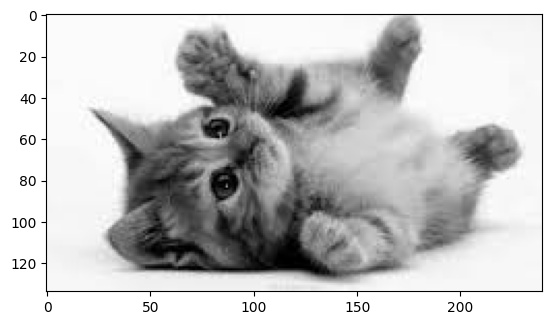

In [10]:
img = Image.open('./gray_kitten.jpg')
plt.imshow(img)

In [11]:
# Visualize results of each operation
def show_image_ops_gray(img, conv_op, sigmoid_op, avg_pool_op, max_pool_op):
    gs1 = gridspec.GridSpec(1, 5)
    plt.subplot(gs1[0, 0]); plt.axis('off'); plt.imshow(img[:, :], cmap=plt.get_cmap('gray'))
    plt.subplot(gs1[0, 1]); plt.axis('off'); plt.imshow(conv_op[0, :, :, 0], cmap=plt.get_cmap('gray'))
    plt.subplot(gs1[0, 2]); plt.axis('off'); plt.imshow(sigmoid_op[0, :, :, 0], cmap=plt.get_cmap('gray'))
    plt.subplot(gs1[0, 3]); plt.axis('off'); plt.imshow(avg_pool_op[0, :, :, 0], cmap=plt.get_cmap('gray'))
    plt.subplot(gs1[0, 4]); plt.axis('off'); plt.imshow(max_pool_op[0, :, :, 0], cmap=plt.get_cmap('gray'))
    plt.show()
            
    
def show_image_ops_rgb(img, conv_op, sigmoid_op, avg_pool_op, max_pool_op):
    gs1 = gridspec.GridSpec(1, 5)
    plt.subplot(gs1[0, 0]); plt.axis('off'); plt.imshow(img[:, :, :])
    plt.subplot(gs1[0, 1]); plt.axis('off'); plt.imshow(conv_op[0, :, :, :])
    plt.subplot(gs1[0, 2]); plt.axis('off'); plt.imshow(sigmoid_op[0, :, :, :])
    plt.subplot(gs1[0, 3]); plt.axis('off'); plt.imshow(avg_pool_op[0, :, :, :])
    plt.subplot(gs1[0, 4]); plt.axis('off'); plt.imshow(max_pool_op[0, :, :, :])
    plt.show()

def show_shapes(img, conv_op, sigmoid_op, avg_pool_op, max_pool_op):
    print("""
        image filters (shape {})
        conv_op filters (shape {})
        sigmoid_op filters (shape {})
        avg_pool_op filters (shape {})
        max_pool_op filters (shape {})
        """.format(
            img.shape, conv_op.shape, sigmoid_op.shape, avg_pool_op.shape, max_pool_op.shape))

In [12]:
def convolve(img, kernel, strides=[1, 3, 3, 1], pooling=[1, 3, 3, 1], padding='SAME', rgb=True):
    with tf.Graph().as_default():
        num_maps = 3
        if not rgb:
            num_maps = 1  # set number of maps to 1
            img = img.convert('L', (0.2989, 0.5870, 0.1140, 0))  # convert to gray scale
        
        
        # reshape image to have a leading 1 dimension
        img = np.asarray(img, dtype='float32') / 256.
        img_shape = img.shape
        img_reshaped = img.reshape(1, img_shape[0], img_shape[1], num_maps)
        
        x = tf.placeholder('float32', [1, None, None, num_maps])
        w = tf.get_variable('w', initializer=tf.to_float(kernel))
        
        # operations
        conv = tf.nn.conv2d(x, w, strides=strides, padding=padding)
        sig = tf.sigmoid(conv)
        max_pool = tf.nn.max_pool(sig, ksize=[1, 3, 3, 1], strides=[1, 3, 3, 1], padding=padding)
        avg_pool = tf.nn.avg_pool(sig, ksize=[1, 3, 3, 1], strides=[1, 3, 3, 1], padding=padding)
        
        init = tf.initialize_all_variables()
        with tf.Session() as session:
            session.run(init)
            conv_op, sigmoid_op, avg_pool_op, max_pool_op = session.run([conv, sig, avg_pool, max_pool],
                                                                        feed_dict={x: img_reshaped})
            
        show_shapes(img, conv_op, sigmoid_op, avg_pool_op, max_pool_op)
        if rgb:
            show_image_ops_rgb(img, conv_op, sigmoid_op, avg_pool_op, max_pool_op)
        else:
            show_image_ops_gray(img, conv_op, sigmoid_op, avg_pool_op, max_pool_op)

Instructions for updating:
Use `tf.cast` instead.
Instructions for updating:
Use `tf.global_variables_initializer` instead.

        image filters (shape (134, 240))
        conv_op filters (shape (1, 45, 80, 1))
        sigmoid_op filters (shape (1, 45, 80, 1))
        avg_pool_op filters (shape (1, 15, 27, 1))
        max_pool_op filters (shape (1, 15, 27, 1))
        


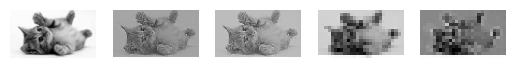


        image filters (shape (134, 240, 3))
        conv_op filters (shape (1, 45, 80, 3))
        sigmoid_op filters (shape (1, 45, 80, 3))
        avg_pool_op filters (shape (1, 15, 27, 3))
        max_pool_op filters (shape (1, 15, 27, 3))
        

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


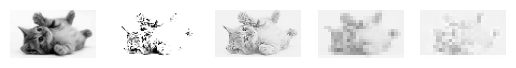

In [13]:
# sharpen
a = np.zeros([3, 3, 1, 1])
a[1, 1, :, :] = 5
a[0, 1, :, :] = -1
a[1, 0, :, :] = -1
a[2, 1, :, :] = -1
a[1, 2, :, :] = -1
convolve(img, a, rgb=False)

# sharpen rgb
a = np.zeros([3, 3, 3, 3])
a[1, 1, :, :] = 5
a[0, 1, :, :] = -1
a[1, 0, :, :] = -1
a[2, 1, :, :] = -1
a[1, 2, :, :] = -1
convolve(img, a)


        image filters (shape (134, 240))
        conv_op filters (shape (1, 45, 80, 1))
        sigmoid_op filters (shape (1, 45, 80, 1))
        avg_pool_op filters (shape (1, 15, 27, 1))
        max_pool_op filters (shape (1, 15, 27, 1))
        


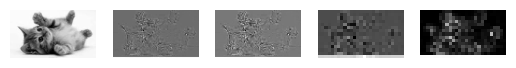

In [14]:
# outline
a = np.zeros([3, 3, 1, 1])
a[:, :, :, :] = -1
a[1, 1, :, :] = 8
convolve(img, a, rgb=False)


        image filters (shape (134, 240))
        conv_op filters (shape (1, 45, 80, 1))
        sigmoid_op filters (shape (1, 45, 80, 1))
        avg_pool_op filters (shape (1, 15, 27, 1))
        max_pool_op filters (shape (1, 15, 27, 1))
        


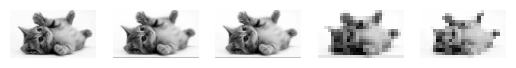

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).



        image filters (shape (134, 240, 3))
        conv_op filters (shape (1, 45, 80, 3))
        sigmoid_op filters (shape (1, 45, 80, 3))
        avg_pool_op filters (shape (1, 15, 27, 3))
        max_pool_op filters (shape (1, 15, 27, 3))
        


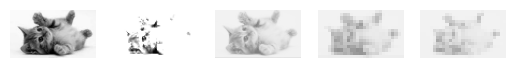

In [15]:
# blurr
a = np.zeros([3, 3, 1, 1])
a[1, 1, :, :] = 0.25
a[0, 1, :, :] = 0.125
a[1, 0, :, :] = 0.125
a[2, 1, :, :] = 0.125
a[1, 2, :, :] = 0.125
a[0, 0, :, :] = 0.0625
a[0, 2, :, :] = 0.0625
a[2, 0, :, :] = 0.0625
a[2, 2, :, :] = 0.0625
convolve(img, a, rgb=False)

# blurr
a = np.zeros([3, 3, 3, 3])
a[1, 1, :, :] = 0.25
a[0, 1, :, :] = 0.125
a[1, 0, :, :] = 0.125
a[2, 1, :, :] = 0.125
a[1, 2, :, :] = 0.125
a[0, 0, :, :] = 0.0625
a[0, 2, :, :] = 0.0625
a[2, 0, :, :] = 0.0625
a[2, 2, :, :] = 0.0625
convolve(img, a)


        image filters (shape (134, 240))
        conv_op filters (shape (1, 45, 80, 1))
        sigmoid_op filters (shape (1, 45, 80, 1))
        avg_pool_op filters (shape (1, 15, 27, 1))
        max_pool_op filters (shape (1, 15, 27, 1))
        


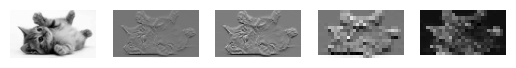

In [16]:
# darken
a = np.zeros([3, 3, 1, 1])
a[0, :, :, :] = 1
a[0, 1, :, :] = 2
a[2, :, :, :] = -1
a[2, 1, :, :] = -2
convolve(img, a, rgb=False)

Ascent picture

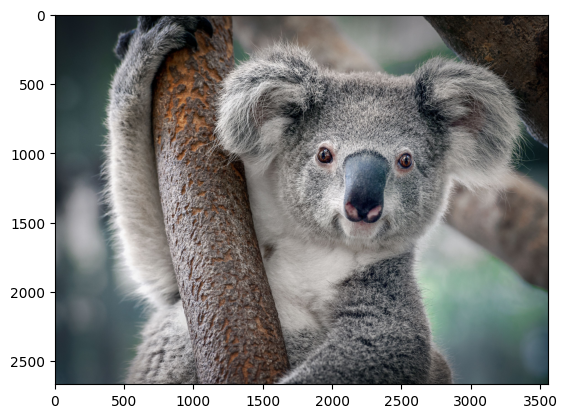

In [17]:
img = Image.open('F:\Kaggle\koala.jpg')
plt.imshow(img)


        image filters (shape (2667, 3556))
        conv_op filters (shape (1, 889, 1186, 1))
        sigmoid_op filters (shape (1, 889, 1186, 1))
        avg_pool_op filters (shape (1, 297, 396, 1))
        max_pool_op filters (shape (1, 297, 396, 1))
        


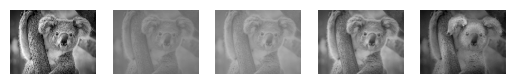


        image filters (shape (2667, 3556, 3))
        conv_op filters (shape (1, 889, 1186, 3))
        sigmoid_op filters (shape (1, 889, 1186, 3))
        avg_pool_op filters (shape (1, 297, 396, 3))
        max_pool_op filters (shape (1, 297, 396, 3))
        


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


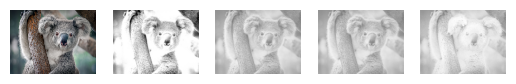

In [18]:
# sharpen
a = np.zeros([3, 3, 1, 1])
a[1, 1, :, :] = 5
a[0, 1, :, :] = -1
a[1, 0, :, :] = -1
a[2, 1, :, :] = -1
a[1, 2, :, :] = -1
convolve(img, a, rgb=False)

# sharpen rgb
a = np.zeros([3, 3, 3, 3])
a[1, 1, :, :] = 5
a[0, 1, :, :] = -1
a[1, 0, :, :] = -1
a[2, 1, :, :] = -1
a[1, 2, :, :] = -1
convolve(img, a)

Apply convolutions & Pooling to images

In [19]:
from scipy import misc
i = misc.ascent()

C:\Users\User\AppData\Local\Temp\ipykernel_7016\1511453372.py:2: DeprecationWarning: scipy.misc.ascent has been deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. Dataset methods have moved into the scipy.datasets module. Use scipy.datasets.ascent instead.
  i = misc.ascent()


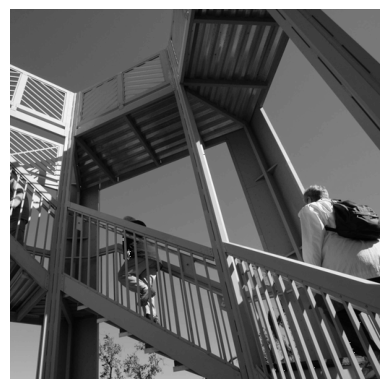

In [20]:
plt.grid(False)
plt.gray()
plt.axis('off')
plt.imshow(i)
plt.show()

In [21]:
i_transformed = np.copy(i)
size_x = i_transformed.shape[0]
size_y = i_transformed.shape[1]

Creating the convolution

In [22]:
#filter = [ [0, 1, 0], [1, -4, 1], [0, 1, 0]] 
filter = [ [-1, -2, -1], [0, 0, 0], [1, 2, 1]]
weight = 1

In [23]:
for x in range(1,size_x-1):
  for y in range(1,size_y-1):
      output_pixel = 0.0
      output_pixel = output_pixel + (i[x - 1, y-1] * filter[0][0])
      output_pixel = output_pixel + (i[x, y-1] * filter[0][1])
      output_pixel = output_pixel + (i[x + 1, y-1] * filter[0][2])
      output_pixel = output_pixel + (i[x-1, y] * filter[1][0])
      output_pixel = output_pixel + (i[x, y] * filter[1][1])
      output_pixel = output_pixel + (i[x+1, y] * filter[1][2])
      output_pixel = output_pixel + (i[x-1, y+1] * filter[2][0])
      output_pixel = output_pixel + (i[x, y+1] * filter[2][1])
      output_pixel = output_pixel + (i[x+1, y+1] * filter[2][2])
      output_pixel = output_pixel * weight
      if(output_pixel<0):
        output_pixel=0
      if(output_pixel>255):
        output_pixel=255
      i_transformed[x, y] = output_pixel

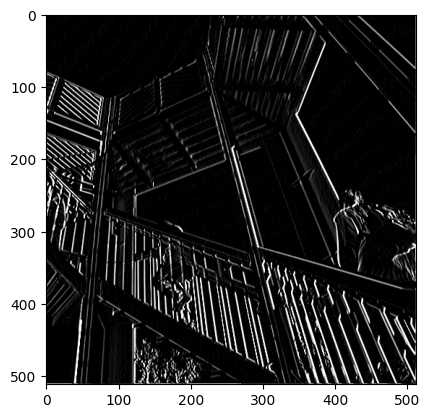

In [24]:
plt.gray()
plt.grid(False)
plt.imshow(i_transformed)
#plt.axis('off')
plt.show() 

Max-Pooling

In [25]:
for x in range(1,size_x-1):
  for y in range(1,size_y-1):
      output_pixel = 0.0
      output_pixel = output_pixel + (i[x - 1, y-1] * filter[0][0])
      output_pixel = output_pixel + (i[x, y-1] * filter[0][1])
      output_pixel = output_pixel + (i[x + 1, y-1] * filter[0][2])
      output_pixel = output_pixel + (i[x-1, y] * filter[1][0])
      output_pixel = output_pixel + (i[x, y] * filter[1][1])
      output_pixel = output_pixel + (i[x+1, y] * filter[1][2])
      output_pixel = output_pixel + (i[x-1, y+1] * filter[2][0])
      output_pixel = output_pixel + (i[x, y+1] * filter[2][1])
      output_pixel = output_pixel + (i[x+1, y+1] * filter[2][2])
      output_pixel = output_pixel * weight
      if(output_pixel<0):
        output_pixel=0
      if(output_pixel>255):
        output_pixel=255
      i_transformed[x, y] = output_pixel

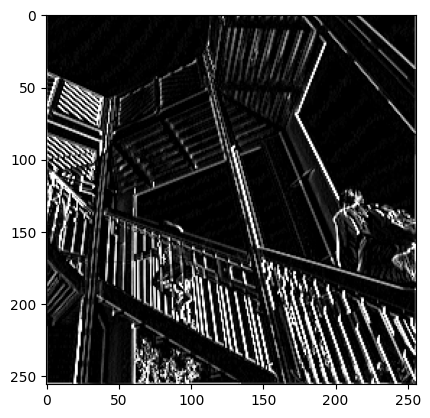

In [26]:
new_x = int(size_x/2)
new_y = int(size_y/2)
newImage = np.zeros((new_x, new_y))
for x in range(0, size_x, 2):
  for y in range(0, size_y, 2):
    pixels = []
    pixels.append(i_transformed[x, y])
    pixels.append(i_transformed[x+1, y])
    pixels.append(i_transformed[x, y+1])
    pixels.append(i_transformed[x+1, y+1])
    pixels.sort(reverse=True)
    newImage[int(x/2),int(y/2)] = pixels[0]
 
# Plot the image. Note the size of the axes -- now 256 pixels instead of 512
plt.gray()
plt.grid(False)
plt.imshow(newImage)
#plt.axis('off')
plt.show()